$Y \sim D(\mu, \sigma)$, where $D$ is any Random Variable Distribution

$$
\begin{aligned}
& \quad y^{\prime}=\frac{y-\mu}{\sigma} \\
& \Rightarrow \quad \mu^{\prime}=0, \quad \sigma^{\prime}=1 \\
& \quad y \subseteq y \quad \text { such that } y_{1 \times n} \\
& \Rightarrow \quad y \sim D(\bar{y}, s) \\
& \Rightarrow \quad y^{\prime}=\frac{y-\bar{y}}{s} \\
& \bar{y}^{\prime}=0, \quad s^{\prime}=1
\end{aligned}
$$


Now
OPT -1

$$
\begin{aligned}
& y^{\prime \prime}=y^{\prime}+[0,0,0 \cdots]_{1 \times m} \\
& \Rightarrow \quad \overline{y^{\prime \prime}}=0, s^{\prime \prime}=s^{\prime} \sqrt{\frac{n}{n+m}}=\sqrt{\frac{n}{n+m}} \\
\end{aligned}
$$


Note $y^{\prime \prime \prime}=\frac{y^{\prime \prime}}{s^{\prime \prime}}=y^{\prime \prime} \frac{\sqrt{n+m}}{\sqrt{n}} \\
y^{\prime \prime \prime}\Rightarrow\left(\frac{y-\bar{y}}{s}\right) \sqrt{\frac{n+m}{n}}$  

OPT 2

$$
\begin{aligned}
& y^{\prime \prime}=y+[0,0,0 \cdots]_{1 \times m} \\
& \Rightarrow y^{\prime \prime \prime}=\frac{y^{\prime \prime}-\bar{y}}{s^{\prime \prime}},\overline{y^{\prime \prime}}=\bar{y},  s^{\prime \prime}=s \sqrt{\frac{n}{n+m}} \\
& \quad \Rightarrow\left(\frac{y-\bar{y}}{s}\right) \sqrt{\frac{n+m}{n}}
\end{aligned}
$$

so here we can se $y^{\prime \prime \prime}$ which is fill nans then standardize will preserve the std to 1 but also adds a inflation factor to the origins values, introducing a bias in the data

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from tabulate import tabulate

In [14]:
#### Some Helpful Functions

In [15]:
# Function to standardize a dataset
def standardize(data):
    return (data - np.nanmean(data)) / np.nanstd(data)

In [16]:
# Function to introduce missing values
def add_missing_values(data, fraction=0.3):
    n_samples = len(data)
    n_nan = int(fraction * n_samples)
    nan_indices = np.random.choice(n_samples, size=n_nan, replace=False)
    data_with_nans = data.copy()
    data_with_nans[nan_indices] = np.nan
    return data_with_nans

In [17]:
def print_diff(df1, df2, funct=np.nanmean,label="The prtg differance is: "):
    diff = 100 * (funct(df1) - funct(df2)) / funct(df1)
    print(f'{label}{diff:.2f}%')

In [18]:
#### Data Generation

In [19]:
# Generate base data
X = np.random.normal(loc=0, scale=1, size=10000)
Z = np.random.normal(loc=0, scale=1, size=10000)
y = -2 * X + 4 * Z + 4  # Response variable

In [20]:
# Standardize the full dataset
y_standardized = standardize(y)

# Add missing values to the dataset
y_with_nans = add_missing_values(y, fraction=0.3)

In [21]:
# Differences between full and missing-value datasets
print('Differences between full and missing-value datasets')
print_diff(y,y_with_nans,np.nanmean,'Mean difference : ')
print_diff(y,y_with_nans,np.nanmedian,'Median difference : ')
print_diff(y,y_with_nans,np.nanstd,'Std dev difference : ')

Differences between full and missing-value datasets
Mean difference : -0.37%
Median difference : -0.14%
Std dev difference : -0.09%


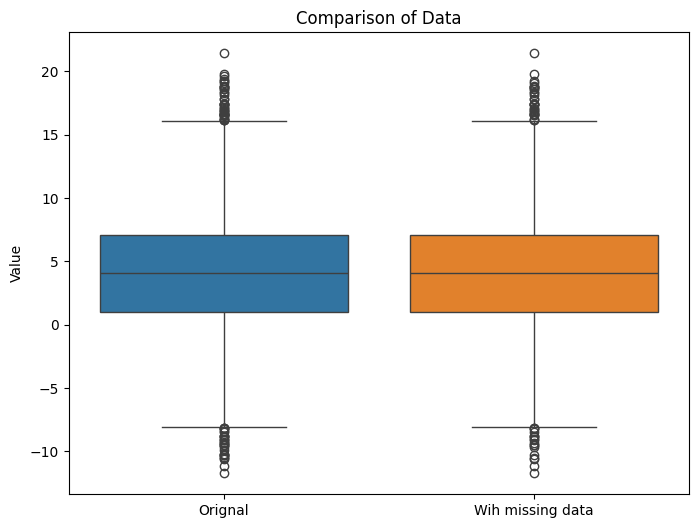

In [22]:
# Create the violin plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(data=[y, y_with_nans])
plt.xticks([0, 1], ['Orignal', 'Wih missing data'])
plt.title('Comparison of Data')
plt.ylabel('Value')
plt.show()

In [23]:
#### We see that the data characteristics are pretty well preserved despite the missing data

In [24]:
# Process datasets with different methods
y_fill_then_std = standardize(np.nan_to_num(y_with_nans, nan=np.nanmean(y_with_nans)))
y_std_then_fill = np.nan_to_num(standardize(y_with_nans), nan = 0.0)

In [25]:
#### Comparison and Visualization

In [26]:
# Differences between the processed datasets
print('1 - std-then-fill/fill-then-std :')
print_diff(y_fill_then_std,y_std_then_fill,np.nanstd,'Std dev difference : ')

1 - std-then-fill/fill-then-std :
Std dev difference : 16.33%


In [27]:
#### So the std deviation is 16.3% smaller. Given n = 0.7, m =0.3, theoretically this would be (1 - sqrt(0.7)) = 16.33%. Hence matches exactly

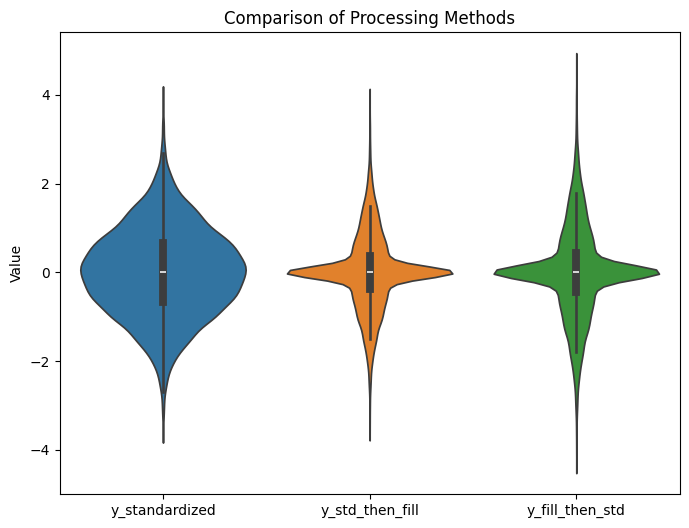

In [28]:
# Create the violin plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.violinplot(data=[y_standardized, y_std_then_fill, y_fill_then_std])
plt.xticks([0, 1, 2], ['y_standardized', 'y_std_then_fill', 'y_fill_then_std'])
plt.title('Comparison of Processing Methods')
plt.ylabel('Value')
plt.show()

In [29]:
#### We notice that while they both are pretty similar both inaverabely lose the characteristics of orignal. But also that FtS had longer tails.

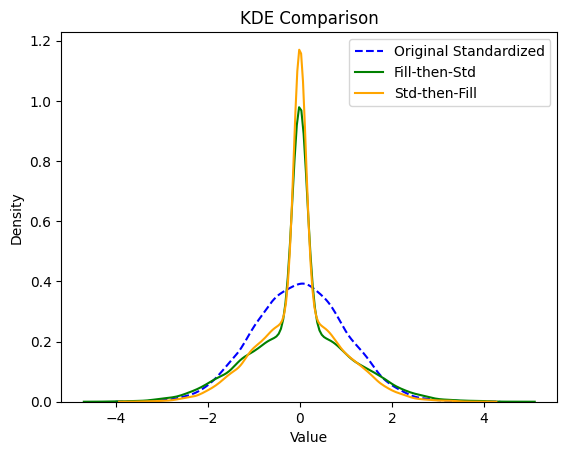

In [30]:
sns.kdeplot(y_standardized, label='Original Standardized', linestyle='--', color='blue')
sns.kdeplot(y_fill_then_std, label='Fill-then-Std', color='green')
sns.kdeplot(y_std_then_fill, label='Std-then-Fill', color='orange')
plt.title('KDE Comparison')
plt.xlabel('Value')
plt.legend()
plt.show()

In [31]:
#### The KDE let's us see this in detail. StF is more acute but then is higher than FtS near 0 (which is closer to origanl) but gets lower for higher values which is beacuse FtS infaltes the distance from mean

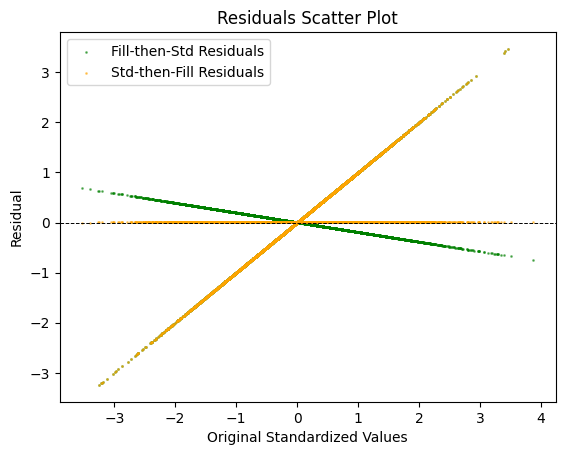

In [34]:
residual_fill_then_std =  y_standardized - y_fill_then_std
residual_std_then_fill = y_standardized - y_std_then_fill

plt.scatter(y_standardized, residual_fill_then_std, alpha=0.5, label='Fill-then-Std Residuals', color='green', s=1)
plt.scatter(y_standardized, residual_std_then_fill, alpha=0.5, label='Std-then-Fill Residuals', color='orange', s=1)
plt.axhline(0, linestyle='--', color='black', linewidth=0.7)
plt.title('Residuals Scatter Plot')
plt.xlabel('Original Standardized Values')
plt.ylabel('Residual')
plt.legend()
plt.show()

In [ ]:
#### Pretty Redundant at this point but here the residuals for origanal points are 0 for StF but for FTS they are equal to V*(1 - sqrt(7)).

In [ ]:
#### This is well and good but what about actual prediction ? Does using StF actually have any benefits, especially since the standardization is just for interpretability of data.

In [ ]:
#### Well mathematically Speaking FtS is just k*StF so the Coef_FtS would be Coef_StF/k. The R-sq should remain the same.
#### In terms of explanation and resemplace to the full dataset I think StF should be preferred.

In [4]:
#### Lets check this by generating a new dependent variable Test which depends with rsq d and has other a omiited factor with std = sca

In [35]:
# Add significance stars
def stars(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.1:
        return "*"
    else:
        return ""

Test = a×y + b + er
\
=> Test = a×σ×y_std + (a×μ + b) + er
\
a  = 2  
b  = 4  
μ  = 4  
σ  = 2√5  
a' = 8.95/d  
b' = 12/d

In [36]:
def reg_test(rsq,sca=1,datasets={"Full":y},is_print=True):
    e = np.random.normal(loc=0, scale=sca, size=10000)  # some error
    Test = 4 + rsq*y + e

    # Initialize a dictionary to store results
    results_dict = {key: [] for key in datasets.keys()}
    rows = ["Constant", "X", "R-squared"]

    for label, data in datasets.items():
        # Add constant to X
        if(np.isnan(data).any()):
          data_cleaned = data[~np.isnan(data)]
          Test_cleaned = Test[~np.isnan(data)]

          X = sm.add_constant(data_cleaned)
          result = sm.OLS(Test_cleaned, X).fit()
        else:
          X = sm.add_constant(data)
          result = sm.OLS(Test, X).fit()
        results_dict[label] = list(result.params) + list(result.pvalues)+[result.rsquared]
        # Extract coefficients, R-squared, and p-values

    if(is_print):
        # Convert results_dict to a matrix for tabulation
        table_data = []
        for label, row in results_dict.items():
            table_data.append([
                f"{row[0]:.3f}{stars(row[2])}",  # const_coef with stars
                f"{row[1]:.3f}{stars(row[3])}",  # X1_coef with stars
                f"{row[4]:0.3f}"  # rsq
            ])
        table_data.extend([
            [0, 100*results_dict['Missing'][1] / results_dict['Full'][1] - 100, 0],
            [0, 100*results_dict['Mis-Std'][1] / results_dict['Standardized'][1] - 100, 0],
            [0, 100*results_dict['Std-then-Fill'][1] / results_dict['Standardized'][1] - 100, 0],
            [0, results_dict['Std-then-Fill'][1] / results_dict['Fill-then-Std'][1], 0]
        ])
        # Add headers and row labels
        table_data = np.array(table_data).T.tolist()
        headers = list(datasets.keys()) + ['Miss vs Full','Mis-Std vs S', 'StF vs S', 'StF/FtS = 1/sqrt(1-m)']
        formatted_table = tabulate(table_data, headers=headers, tablefmt="grid", showindex=rows,floatfmt=".2f")
        print(formatted_table)
        return
    else: return results_dict

In [37]:
datasets = {
    "Full": y,
    "Missing": y_with_nans,
    "Standardized": y_standardized,
    "Mis-Std": standardize(y_with_nans),
    "Std-then-Fill": y_std_then_fill,
    "Fill-then-Std": y_fill_then_std,
}

In [38]:
reg_test(1,1,datasets)

+-----------+----------+-----------+----------------+-----------+-----------------+-----------------+----------------+----------------+------------+-----------------------+
|           | Full     | Missing   | Standardized   | Mis-Std   | Std-then-Fill   | Fill-then-Std   |   Miss vs Full |   Mis-Std vs S |   StF vs S |   FtS/StF = sqrt(1-m) |
+===========+==========+===========+================+===========+=================+=================+================+================+============+=======================+
| Constant  | 3.968*** | 3.962***  | 8.046***       | 8.055***  | 8.046***        | 8.046***        |           0.00 |           0.00 |       0.00 |                  0.00 |
+-----------+----------+-----------+----------------+-----------+-----------------+-----------------+----------------+----------------+------------+-----------------------+
| X         | 1.003*** | 1.003***  | 4.492***       | 4.497***  | 4.497***        | 3.762***        |           0.02 |           0.10 |

In [39]:
reg_test(0.5,1,datasets)

+-----------+----------+-----------+----------------+-----------+-----------------+-----------------+----------------+----------------+------------+-----------------------+
|           | Full     | Missing   | Standardized   | Mis-Std   | Std-then-Fill   | Fill-then-Std   |   Miss vs Full |   Mis-Std vs S |   StF vs S |   FtS/StF = sqrt(1-m) |
+===========+==========+===========+================+===========+=================+=================+================+================+============+=======================+
| Constant  | 3.985*** | 3.978***  | 6.012***       | 6.015***  | 6.012***        | 6.012***        |           0.00 |           0.00 |       0.00 |                  0.00 |
+-----------+----------+-----------+----------------+-----------+-----------------+-----------------+----------------+----------------+------------+-----------------------+
| X         | 0.498*** | 0.499***  | 2.232***       | 2.237***  | 2.237***        | 1.872***        |           0.14 |           0.22 |

In [44]:
reg_test(0.1,1,datasets)

+-----------+----------+-----------+----------------+-----------+-----------------+-----------------+----------------+----------------+------------+-----------------------+
|           | Full     | Missing   | Standardized   | Mis-Std   | Std-then-Fill   | Fill-then-Std   |   Miss vs Full |   Mis-Std vs S |   StF vs S |   FtS/StF = sqrt(1-m) |
+===========+==========+===========+================+===========+=================+=================+================+================+============+=======================+
| Constant  | 3.987*** | 3.982***  | 4.391***       | 4.398***  | 4.391***        | 4.391***        |           0.00 |           0.00 |       0.00 |                  0.00 |
+-----------+----------+-----------+----------------+-----------+-----------------+-----------------+----------------+----------------+------------+-----------------------+
| X         | 0.099*** | 0.102***  | 0.446***       | 0.457***  | 0.457***        | 0.382***        |           2.46 |           2.55 |

In [45]:
reg_test(0.05,1,datasets)

+-----------+----------+-----------+----------------+-----------+-----------------+-----------------+----------------+----------------+------------+-----------------------+
|           | Full     | Missing   | Standardized   | Mis-Std   | Std-then-Fill   | Fill-then-Std   |   Miss vs Full |   Mis-Std vs S |   StF vs S |   FtS/StF = sqrt(1-m) |
+===========+==========+===========+================+===========+=================+=================+================+================+============+=======================+
| Constant  | 3.977*** | 3.970***  | 4.194***       | 4.187***  | 4.194***        | 4.194***        |           0.00 |           0.00 |       0.00 |                  0.00 |
+-----------+----------+-----------+----------------+-----------+-----------------+-----------------+----------------+----------------+------------+-----------------------+
| X         | 0.053*** | 0.053***  | 0.239***       | 0.239***  | 0.239***        | 0.200***        |          -0.08 |           0.01 |

In [56]:
reg_test(0.01,1,datasets)

+-----------+----------+-----------+----------------+-----------+-----------------+-----------------+----------------+----------------+------------+-----------------------+
|           | Full     | Missing   | Standardized   | Mis-Std   | Std-then-Fill   | Fill-then-Std   |   Miss vs Full |   Mis-Std vs S |   StF vs S |   FtS/StF = sqrt(1-m) |
+===========+==========+===========+================+===========+=================+=================+================+================+============+=======================+
| Constant  | 3.989*** | 3.991***  | 4.031***       | 4.035***  | 4.031***        | 4.031***        |           0.00 |           0.00 |       0.00 |                  0.00 |
+-----------+----------+-----------+----------------+-----------+-----------------+-----------------+----------------+----------------+------------+-----------------------+
| X         | 0.010*** | 0.011***  | 0.047***       | 0.048***  | 0.048***        | 0.040***        |           2.13 |           2.22 |

In [47]:
#### So StF vs FtS is indeed just a factor with same Rsq but just dropping the missing values seems to be performing even better.
#### But is that because the missing data is 30% ? what if it was 90% ?
#### To some degree it's also because y is a Normal distribution and Test is actually linearly related to y and the omitted variables, hence losing the data points is not a big problem!
#### Changing these two is beyond the scope of the current exploration but the reader is encourged to do this by changing the forms!

In [48]:
def missing(m,y):
    "From 0 to 1"
    y_with_nans = add_missing_values(y, fraction=m)
    # Process datasets with different methods
    y_fill_then_std = standardize(np.nan_to_num(y_with_nans, nan=np.nanmean(y_with_nans)))
    y_std_then_fill = np.nan_to_num(standardize(y_with_nans), nan = 0.0)

    datasets = {
    "Full": y,
    "Missing": y_with_nans,
    "Standardized": y_standardized,
    "Mis-Std": standardize(y_with_nans),
    "Std-then-Fill": y_std_then_fill,
    "Fill-then-Std": y_fill_then_std,
    }
    return datasets

In [76]:
tabl = {}
for m in [0.2,0.4,0.6,0.8,0.95]:
    dfn = missing(m,y)
    dfn = {key: dfn[key] for key in ["Full","Missing","Standardized","Std-then-Fill"]}
    tabl[m] = []
    for rsq in [1,0.1,0.05]:
        results_dict = reg_test(rsq,1,dfn,is_print=False)
        a = 100*results_dict['Missing'][1] / results_dict['Full'][1] - 100
        b = 100*results_dict['Std-then-Fill'][1] / results_dict['Standardized'][1] - 100
        tabl[m].append([a,b])
rows = ['M vs F','StF vs S','M vs F','StF vs S','M vs F','StF vs S']
m = [0.2,0.4,0.6,0.8,0.95]

table_data = [ [tabl[key][i][j] for key in m] for i in range(3) for j in range(2)]
formatted_table = tabulate(table_data, headers=m, tablefmt="grid", showindex=rows,floatfmt=".2f")
print(formatted_table)

+----------+-------+-------+-------+-------+--------+
|          |   0.2 |   0.4 |   0.6 |   0.8 |   0.95 |
+==========+=======+=======+=======+=======+========+
| M vs F   | -0.03 |  0.13 |  0.31 | -0.15 |  -0.27 |
+----------+-------+-------+-------+-------+--------+
| StF vs S | -0.31 | -0.00 |  0.25 | -1.38 |   5.40 |
+----------+-------+-------+-------+-------+--------+
| M vs F   |  1.09 |  0.85 |  1.22 |  3.30 |  10.80 |
+----------+-------+-------+-------+-------+--------+
| StF vs S |  0.81 |  0.72 |  1.16 |  2.03 |  17.09 |
+----------+-------+-------+-------+-------+--------+
| M vs F   | -0.58 |  3.65 |  3.16 | -7.69 |   6.21 |
+----------+-------+-------+-------+-------+--------+
| StF vs S | -0.86 |  3.52 |  3.10 | -8.82 |  12.24 |
+----------+-------+-------+-------+-------+--------+


In [ ]:
#### Very interesting to see that the results are entirely mixed. For data with low rsq and 60% data missing StF does better though but is this conclusion robust ??